# Graphs

In [21]:
%cd ..

/Users/robin/Documents/Projects/soc-rag


/Users/robin/Documents/Projects/soc-rag/.venv/lib/python3.12/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [22]:
from benchmark import BenchmarkResultSet
from pandas import DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

In [23]:
LINEWIDTH = 0.75
PALETTE = "pastel"
sns.set_theme(style="whitegrid", font="Times New Roman", palette=PALETTE, rc={
    "font.size": 8,
    "axes.titlesize": 8,
    "axes.labelsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "legend.title_fontsize": 8,
    "legend.fontsize": 5,
    "lines.linewidth": LINEWIDTH,
    "patch.linewidth": 0.4,
    "hatch.linewidth": 0.1,
    "boxplot.flierprops.linewidth": LINEWIDTH,
    "boxplot.flierprops.markeredgewidth": LINEWIDTH,
    "boxplot.boxprops.linewidth": LINEWIDTH,
    "boxplot.whiskerprops.linewidth": LINEWIDTH,
    "boxplot.capprops.linewidth": LINEWIDTH,
    "boxplot.medianprops.linewidth": LINEWIDTH,
    "boxplot.meanprops.linewidth": LINEWIDTH,
})
# mpl.rcParams["text.usetex"] = True
FIGSIZE_SINGLE = (3.5, 2)
FIGSIZE_DOUBLE = (7.16, 3)
RESULTS_DIRECTORY = "analysis/diagrams"

In [24]:
def initialize_plot(figsize):
    figure, axis = plt.subplots(figsize=figsize, dpi=300)
    plt.tight_layout()
    return axis

In [25]:
def finalize_plot(axis, filename):
    sns.move_legend(axis, "center left", bbox_to_anchor=(1, 0.5), frameon=False)
    sns.despine(left=True, bottom=True)
    plt.savefig(os.path.join(RESULTS_DIRECTORY, f"{filename}.pdf"), bbox_inches="tight")

In [6]:
def draw_violine(data: DataFrame, x: str, y: str, filename: str, hue=None, hue_order=None, figsize=FIGSIZE_DOUBLE, split=False):
    axis = initialize_plot(figsize)
    sns.violinplot(data, x=x, y=y, hue=hue, hue_order=hue_order, ax=axis, split=split)
    finalize_plot(axis, filename)
def draw_violine_swarm(data: DataFrame, x: str, y: str, filename: str, hue=None, hue_order=None, figsize=FIGSIZE_DOUBLE):
    axis = initialize_plot(figsize)
    sns.violinplot(data, x=x, y=y, hue=hue, hue_order=hue_order, ax=axis, inner=None)
    sns.move_legend(axis, "lower right")
    sns.swarmplot(data=data, size=1, x=x, y=y, hue=hue, hue_order=hue_order, ax=axis, dodge=True, legend=False, palette='dark:k')
    sns.despine(left=True, bottom=True)
    finalize_plot(axis, filename)
def draw_box(data: DataFrame, x: str, y: str, filename: str, hue=None, hue_order=None, figsize=FIGSIZE_DOUBLE):
    axis = initialize_plot(figsize)
    sns.boxplot(data, x=x, y=y, hue=hue, hue_order=hue_order, ax=axis)
    finalize_plot(axis, filename)

In [7]:
DOMAIN = "Domain"
BENCHMARK = "Benchmark"
RECALL = "Recall"
PRECISION = "Precision"
MODEL = "Model"
CHUNKING_STRATEGY = "Chunking Strategy"
TOKEN = "Token"
K = "K"
NUMBER_OF_BENCHMARKS = 5
MODELS = ["bge_small", "oai"]
KS = ["5", "10", "20"]
CHUNKING_STRATEGIES = [
    # "whole_document_1024_0",
    # "whole_document_2048_0",
    # "whole_document_4096_0",
    # "whole_document_8191_0",
    # "whole_document_1024_50",
    # "whole_document_2048_50",
    # "whole_document_4096_50",
    # "whole_document_8191_50",
    "endpoint_split_1024_0",
    # "endpoint_split_2048_0",
    # "endpoint_split_4096_0",
    # "endpoint_split_8191_0",
    "endpoint_split_1024_50",
    # "endpoint_split_2048_50",
    # "endpoint_split_4096_50",
    # "endpoint_split_8191_50",
    "endpoint_split_thin",
    "endpoint_split_field",
    # "json_1024_0",
    # "json_2048_0",
    # "json_4096_0",
    # "json_8191_0",
    # "json_1024_50",
    # "json_2048_50",
    # "json_4096_50",
    # "json_8191_50",
    "query_extraction",
    "summary",
    "craft",
]

In [8]:
def merge_benchmark_results(results: list[BenchmarkResultSet], chunking_strategy: str, model: str, k: str) -> DataFrame:
    assert len(results) > 0
    assert chunking_strategy
    assert len(chunking_strategy) > 0
    assert model
    assert len(model) > 0
    data = [[result.name, model, chunking_strategy, benchmark_result.name.title(), k, entry.recall, entry.precision] for result in results for benchmark_result in result.results for entry in benchmark_result.entries]
    return DataFrame(data, columns=[BENCHMARK, MODEL, CHUNKING_STRATEGY, DOMAIN, K, RECALL, PRECISION])

In [9]:
def load_results(model, k, chunking_strategy):
    result_files = [open(f'../data/socbenchd_{i+1}/{model}/{chunking_strategy}/results_{k}.json').read() for i in range(NUMBER_OF_BENCHMARKS)]
    results = [BenchmarkResultSet.model_validate_json(result_file) for result_file in result_files]
    return merge_benchmark_results(results, chunking_strategy, model, k)
results = [load_results(model, k, chunking_strategy) for model in MODELS for k in KS for chunking_strategy in CHUNKING_STRATEGIES]
dataframe = pd.concat(results)

In [10]:
dataframe

,Benchmark,Model,Chunking Strategy,Domain,K,Recall,Precision
0,socbenchd_1,bge_small,endpoint_split_1024_0,Energy,5,0.200000,0.200000
1,socbenchd_1,bge_small,endpoint_split_1024_0,Energy,5,0.400000,0.400000
2,socbenchd_1,bge_small,endpoint_split_1024_0,Energy,5,0.375000,0.600000
3,socbenchd_1,bge_small,endpoint_split_1024_0,Energy,5,0.666667,0.400000
4,socbenchd_1,bge_small,endpoint_split_1024_0,Energy,5,0.800000,0.800000
...,...,...,...,...,...,...,...
545,socbenchd_5,oai,craft,Real Estate,20,1.000000,0.200000
546,socbenchd_5,oai,craft,Real Estate,20,0.714286,0.250000
547,socbenchd_5,oai,craft,Real Estate,20,0.500000,0.150000
548,socbenchd_5,oai,craft,Real Estate,20,0.666667,0.100000


## Chunking strategy $\leftrightarrow$ Model

In [11]:
test = dataframe[(dataframe[MODEL] == "oai")]
print(test.loc[:, RECALL].mean())
print(test.loc[:, RECALL].median())

0.6639010950569392
0.6666666666666666


In [12]:
test = dataframe[(dataframe[MODEL] == "bge_small")]
print(test.loc[:, RECALL].mean())
print(test.loc[:, RECALL].median())

0.6358366253755864
0.6666666666666666


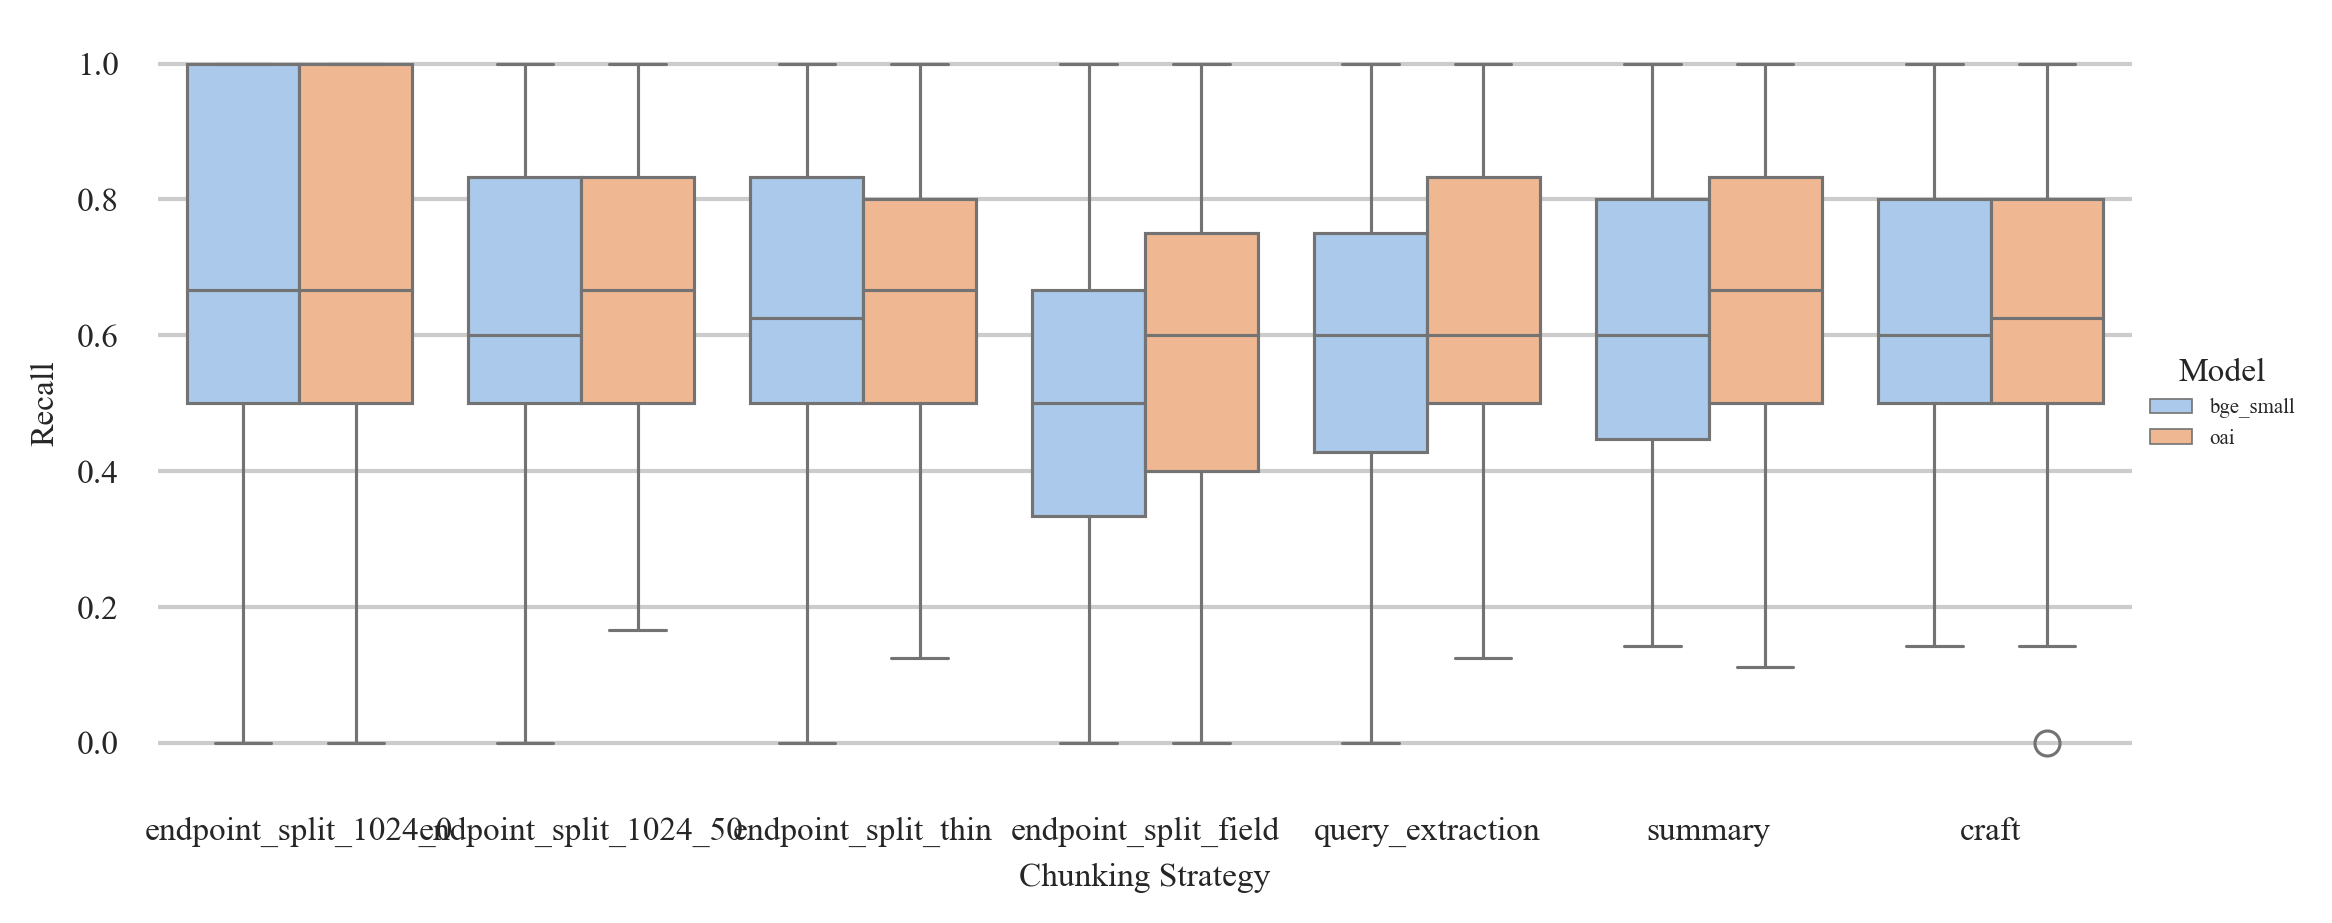

In [20]:
strategy_model = dataframe[(dataframe[CHUNKING_STRATEGY] == "endpoint_split_1024_0") | (dataframe[K] == "10")]
draw_box(strategy_model, x=CHUNKING_STRATEGY, y=RECALL, hue=MODEL, filename="strategy_model", figsize=FIGSIZE_DOUBLE)

## Domain $\leftrightarrow$ Recall

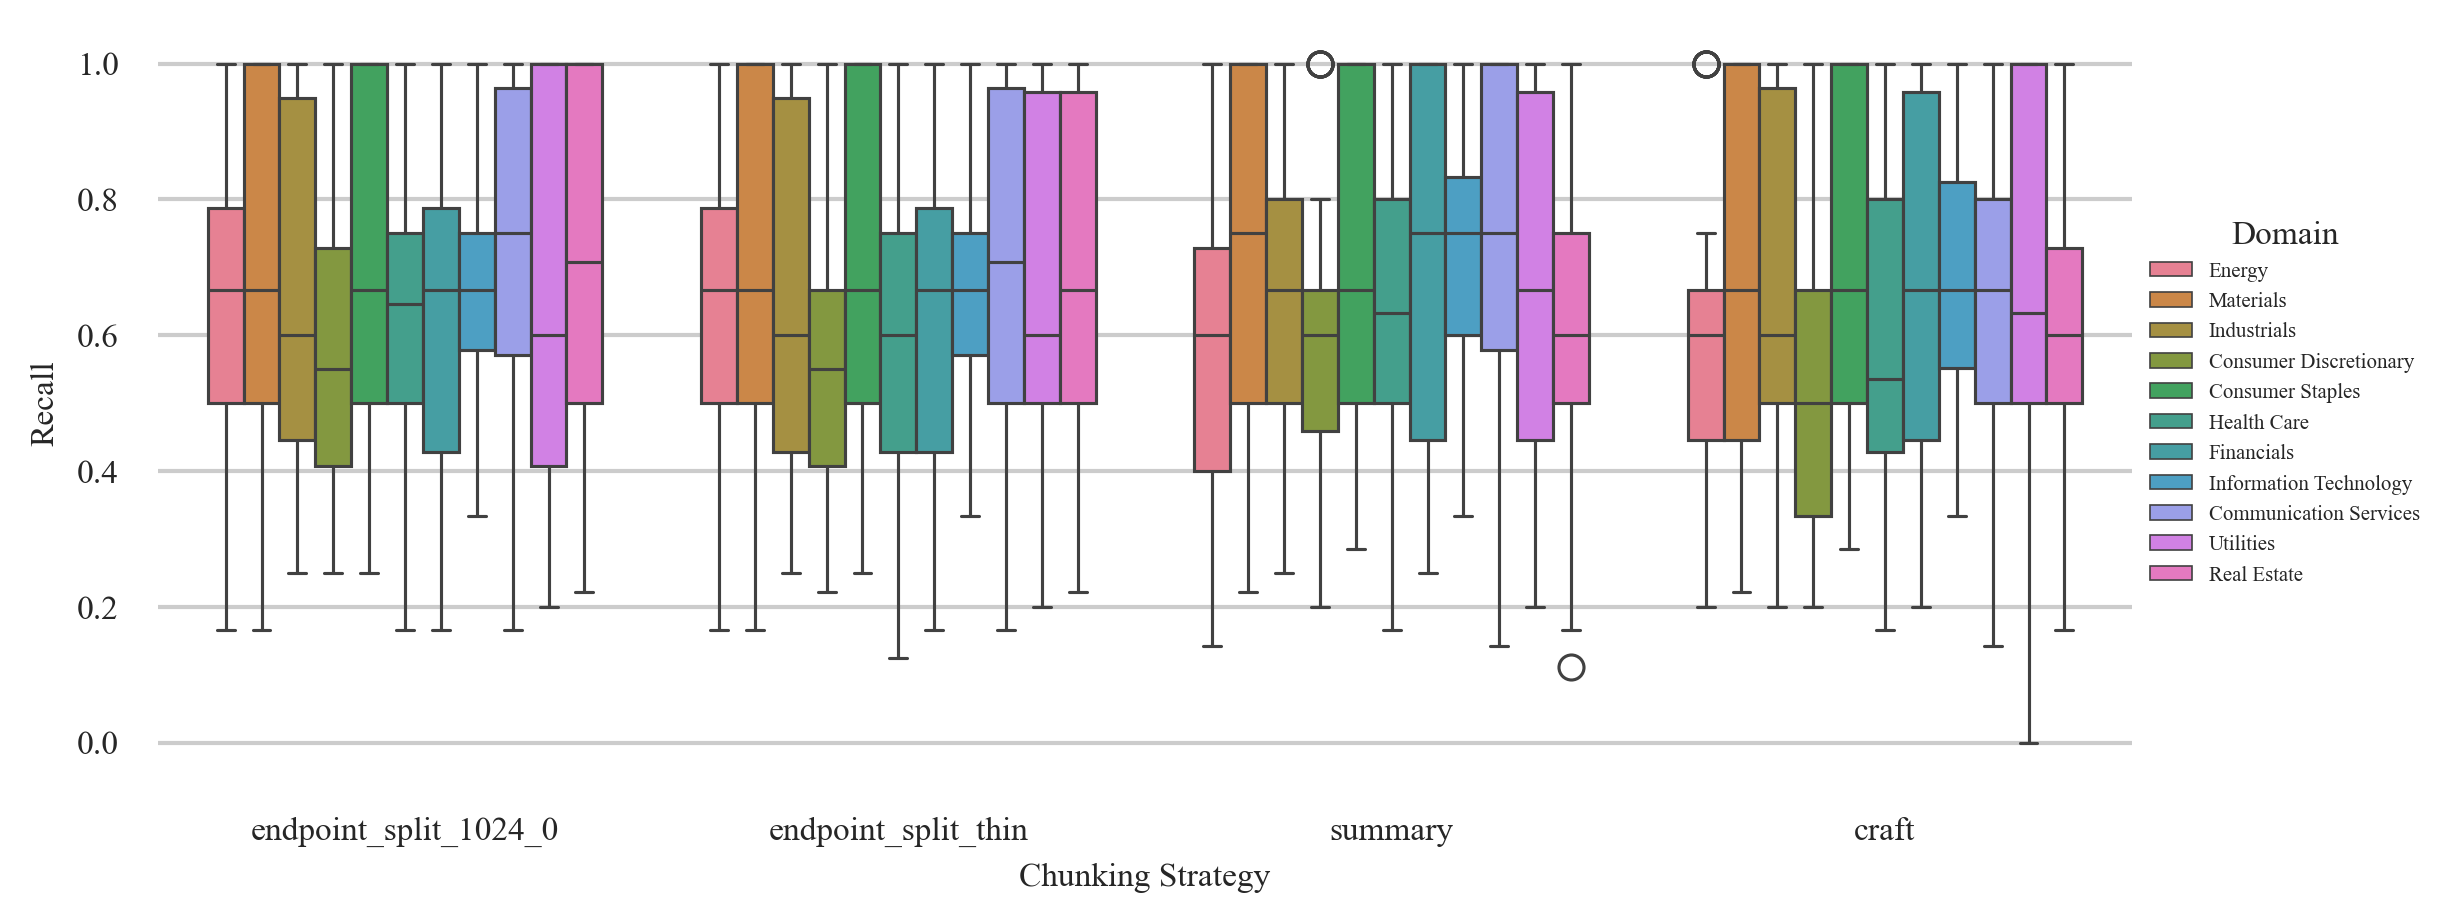

In [19]:
chunking_strategies = ["summary", "craft", "endpoint_split_1024_0", "endpoint_split_thin"]
filtered = dataframe[(dataframe[CHUNKING_STRATEGY].isin(chunking_strategies)) & (dataframe[K] == "10") & (dataframe[MODEL] == "oai")]
draw_box(filtered, CHUNKING_STRATEGY, RECALL, hue=DOMAIN, filename="recall", figsize=FIGSIZE_DOUBLE)

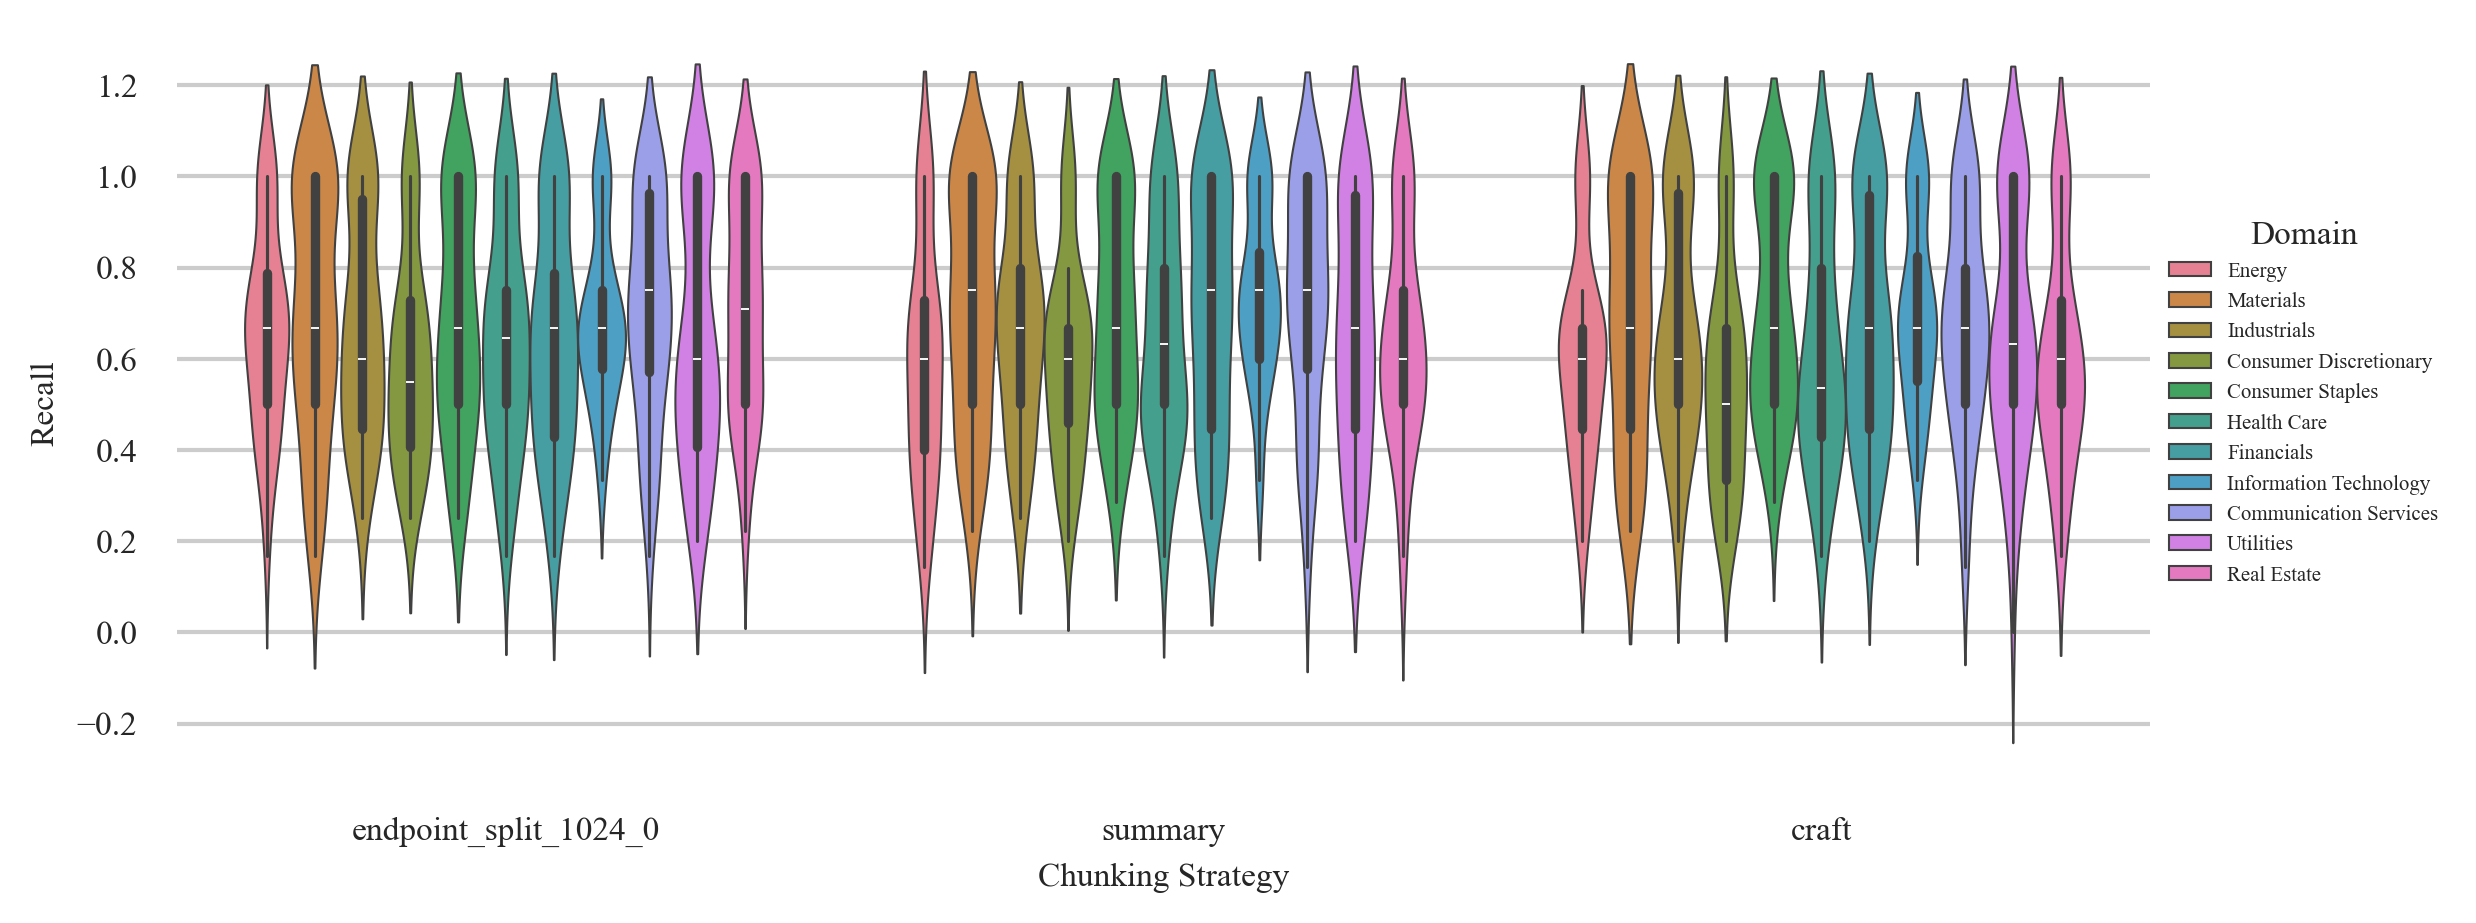

In [15]:
draw_violine(filtered, CHUNKING_STRATEGY, RECALL, hue=DOMAIN, filename="recall_violine", figsize=FIGSIZE_DOUBLE)